In [1]:
import pandas as pd
import os

os.chdir(r'./data') #경로 설정

iris = pd.read_csv('IRIS.csv.xls')
iris.head()

iris['species'].value_counts()

iris['id'] = range(len(iris)) #각각을 구별하기 위해 추가
iris = iris[['id','sepal_length','sepal_width','petal_length','petal_width','species']] #컬럼순서 변경
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train = iris.sample(100, replace=False, random_state=2020).reset_index(drop=True)
# replace=False : 비복원추출
# random_state : 난수 고정

test = iris.loc[ ~iris['id'].isin(train['id']) ].reset_index(drop=True)
# ~ : not의 의미, True면 False를, False이면 True를 반환
# x.isin(y) : x가 y에 속하면 True, 속하지 않으면 False를 반환 

# 의사결정나무

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
dt = DecisionTreeClassifier( min_samples_split = 10 )

In [6]:
dt.fit(train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'])

DecisionTreeClassifier(min_samples_split=10)

In [8]:
predictions = dt.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

In [9]:
test['pred'] = predictions
test.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
1,3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
2,6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
3,9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
4,20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa


In [10]:
(test['pred']==test['species']).mean()

0.96

In [11]:
# 시각화하기
from sklearn import tree
import matplotlib.pyplot as plt

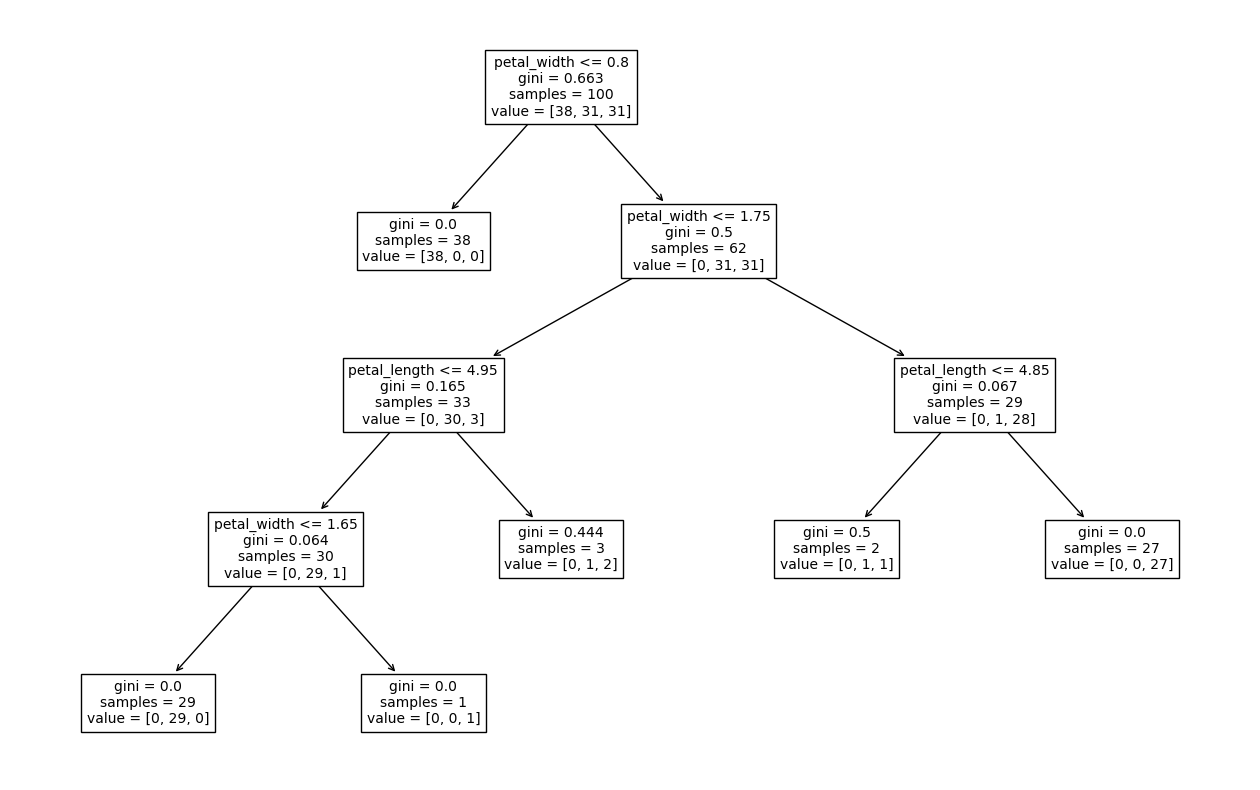

In [14]:
# tree.plot_tree(학습시킨모델, feature_names= , fontsize=)
plt.subplots(figsize=(16,10))
a = tree.plot_tree(dt, feature_names=['sepal_length','sepal_width','petal_length','petal_width'], fontsize=10)

# cross validation

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [17]:
dt = DecisionTreeClassifier(min_samples_split = 10)

In [20]:
np.mean(cross_val_score(dt, iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'], cv=3))

0.9666666666666667